# Handwritten Digit Recognizer

###### THEORY

We will be using Gaussian generative model to recognize Handwritten digit images from MNIST dataset. There are a total of 60000 training images and 10000 test images. We will build a classifier model using Multivariate Gaussian to identify/classify the digits.

Here is the formula for Multivariate Gaussian:-
<img src="MG_Form.png">

Σ - Covariance Matrix
µ - Mean Vector
 - Feature Vector
p - probability density

First we start with analyzing our dataset, 
We have 60000 training images with 784 pixels each
We divide our training set into training and validation set of 50000,10000 respectively

We have 10 classes 0,1,2,3,4,5,6,7,8,9 to classify our data

To train the nodel we do the following:-

1. Get the prior probabilities(pi) of classes from training labels
2. Derive the mean vector (µ) for each class 
3. Derive the covariance matrix (Σ) for each
4. Based on the parameters derived in steps 1 to 3 define your prediction function using the multivariate gaussian formula

Prediction Algorithm

For each image(x):
   For each class:

1. Plugin the Σ,µ,x into the formula and get probability density(p)
2. Multiply pi with p 

3. Get the class i with max of pi*p for image x

Your prediction for x is class i

###### Import the necessary libraries

In [860]:
import pandas as pd
from struct import unpack
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import time
import datetime
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score

##### Function to load MNIST digits into numpy arrays

In [870]:
#Function to load data
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

#Function to dispay the digits
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    

###### Call function to load data

In [873]:
x,y = loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')


In [182]:
x_df = pd.DataFrame(x)


###### Display first image

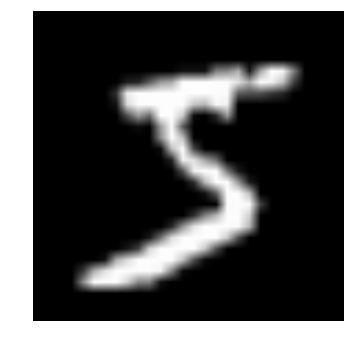

In [874]:
displaychar(x[0])

###### Splitting the train data into train and validation set

In [708]:
from sklearn.cross_validation import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(y, 10, test_size=0.16666666666666667, random_state=23)

for train_index, test_index in sss:
    X_train, X_val = x_df.values[train_index], x_df.values[test_index]
    y_train, y_val = y[train_index], y[test_index]
    

In [709]:
X_train.shape


(50000, 784)

In [710]:
X_val.shape


(10000, 784)

###### Load Test Data

In [793]:
x_test,y_test = loadmnist('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')


In [794]:
x_test.shape


(10000, 784)

###### Fit the model

Class Prior Probabilities for training data

In [711]:
y_train.size


50000

In [187]:
pi={}
for j in range(0,10):
    pi[j]=float((y_train[y_train==j].size))/y_train.size
    

In [712]:
pi


{0: 0.09872222222222223,
 1: 0.11237037037037037,
 2: 0.0992962962962963,
 3: 0.10218518518518518,
 4: 0.09737037037037037,
 5: 0.09035185185185185,
 6: 0.09862962962962964,
 7: 0.10440740740740741,
 8: 0.09751851851851852,
 9: 0.09914814814814815}

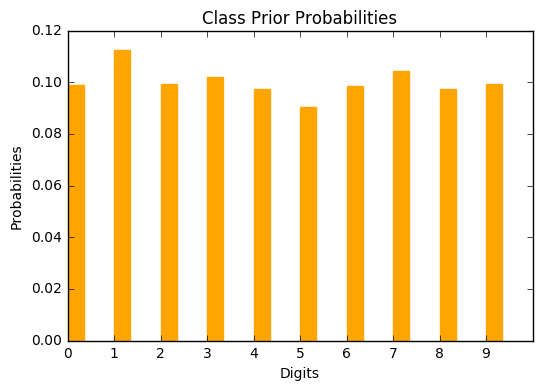

In [762]:
plt.bar(pi.keys(),pi.values(),width=.35,color='orange',edgecolor='orange',animated=True)
ind = np.arange(10)
plt.ylabel('Probabilities')
plt.xlabel('Digits')
plt.title('Class Prior Probabilities')
plt.xticks(ind, ('0', '1', '2', '3', '4','5','6','7','8','9'))
print 
plt.show()

###### Create a new Dataframe with classes

In [189]:
X_train_w_class = pd.DataFrame(X_train)


In [190]:
X_train_w_class['class']=y_train


In [191]:
X_train_w_class


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


###### Calculate the mean(expected value for each class)

In [192]:
mu=np.ndarray(shape=(10,784))


In [193]:
for i in range(0,10):
    X_temp=X_train_w_class[X_train_w_class['class']==i]
    X_temp=X_temp.drop(['class'],axis=1)
    mu[i]=np.einsum('ij->j',X_temp)/float(X_temp.shape[0])
    

In [18]:
mu[0].shape


(784,)

###### Derive the covariance matrices

In [194]:
cov1=np.ndarray(shape=(10,784,784))


In [195]:
X_train=X_train.astype(float)


In [196]:
for j in range(0,10):
    for i in X_train_w_class[X_train_w_class['class']==j].index:
        cov1[j]+=np.einsum('...i,j...->ij',(X_train[i]-mu[j]),np.transpose(X_train[i]-mu[j]))
    cov1[j]=cov1[j]/y_train[y_train==j].size
    

In [765]:
cov1.shape

(10, 784, 784)

###### Function to make the prediction

An important point note here are the constants being used to add to the covariance matrix

The reason we use cI (constant * identity matrix) here is to avoid singularity issues in covariance matrix
I derived at the below list of constants with some experimentation. At first taking 3700 for all classes gave an error of about 4.5% which then came down to 3.65% with some tuning to the constants.

In [776]:
def LDA_predict(x_test,y_test):
    c=np.array(cov1)
    con=[3700,4000,3700,3600,3700,3600,3700,3700,3700,3800] #the arbitary constant value to avoid singular matrix issues
    #To get the start time
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print st
    p_t=np.ndarray(shape=(10,y_test.size))
    p=np.ndarray(shape=(y_test.size,))
    y_pred = np.ndarray(shape=(y_test.size,))
    for i in range(10):
        c[i]+=float(con[i])*np.identity(784)
        p=multivariate_normal.logpdf(x_test.astype(float), mean=mu[i].astype(float), cov=c[i].astype(float))
        p+=np.log(pi[i])
        p_t[i]=p
    for j in range(y_test.size):
        y_pred[j]=p_t[:,j].argmax()
    #to get the end time
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    print st
    return y_test, y_pred

###### Test the model on validation set

In [789]:
c=np.ndarray(shape=(10,784,784))
c=np.array(cov1)

In [779]:
y_test,y_pred=LDA_predict(X_val,y_val)

2017-02-18 20:57:59
2017-02-18 20:58:01


###### Get the loss score for validation set

In [788]:
print "Your loss for validation set is",(1-accuracy_score(y_test, y_pred))*100,"%"

Your loss for validation set is 3.38 %


###### Test the model on test set

In [795]:
c=np.ndarray(shape=(10,784,784))
c=np.array(cov1)

In [796]:
y_test,y_pred=LDA_predict(x_test,y_test)

2017-02-18 21:03:17
2017-02-18 21:03:19


###### Get the loss score for test set

In [797]:
print "Your loss for test set is",(1-accuracy_score(y_test, y_pred))*100,"%"

Your loss for test set is 3.65 %


###### Plot the confusion matrix

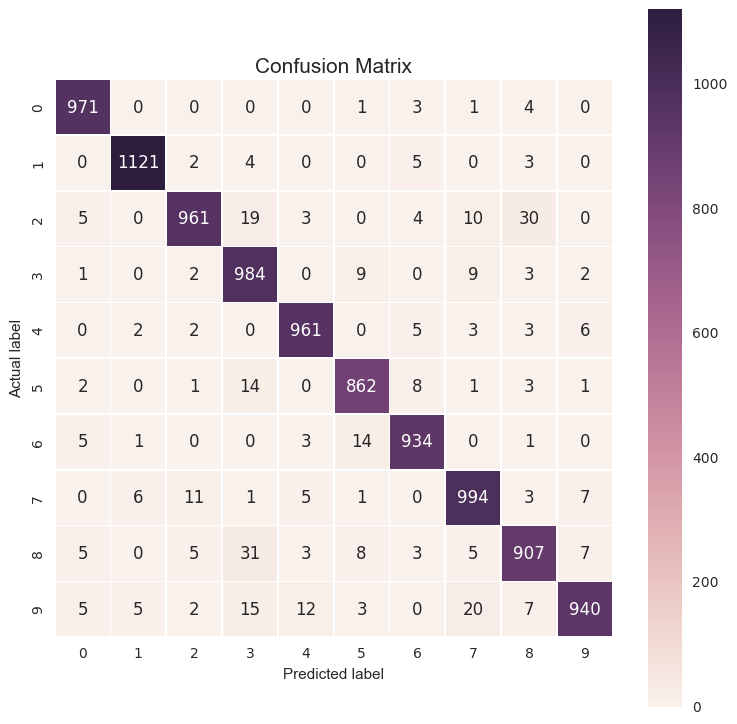

In [876]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_normalized=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
confusion_matrix = pd.DataFrame(data = cm_normalized)
sns.heatmap(confusion_matrix,annot=True,fmt="d",linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);  
plt.show()

###### Print out 5 random wrong predictions

Random Indices picked: [2293, 3681, 1800, 4078, 9692]
Predicted 0 and Actual 9


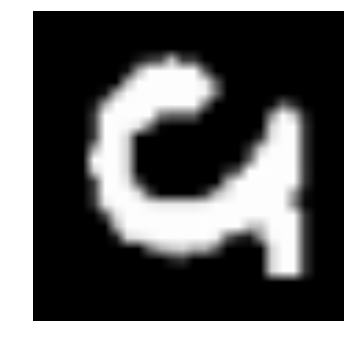

Predicted 3 and Actual 2


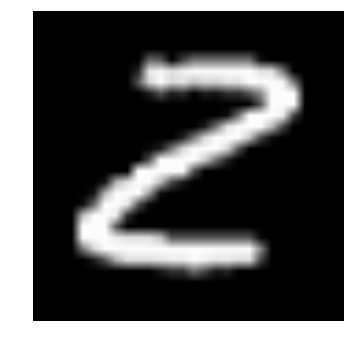

Predicted 4 and Actual 6


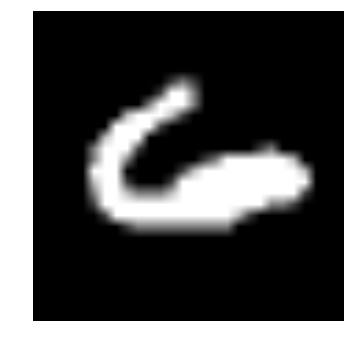

Predicted 3 and Actual 9


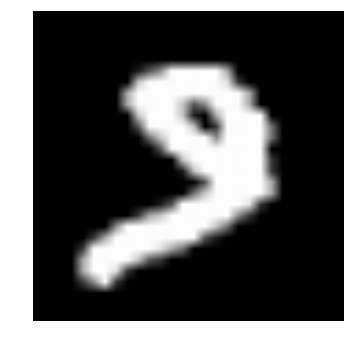

Predicted 7 and Actual 9


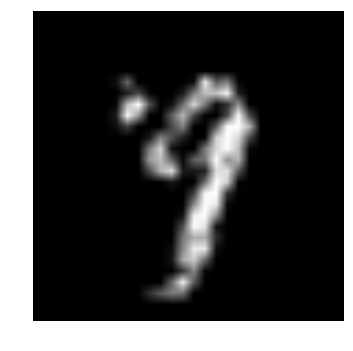

In [853]:
y_show = random.sample(y_wrong[0],5)
print "Random Indices picked:",y_show
for i in y_show:
    print "Predicted",int(y_pred[i]),"and Actual",y_test[i]
    displaychar(x_test[i])